# Sophisticated regression analysis

In order to do a regression analysis, we'll have to collect some data on your bitchiness and plot it on a graph. 

Text(0, 0.5, 'Niceness')

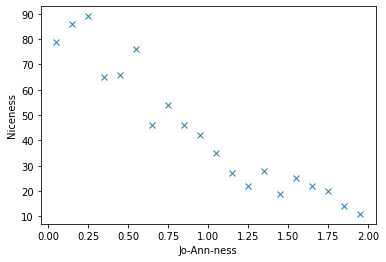

In [24]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def decay(N0,k,t,dt):

    N=N0
    time=0.
    D=0.
    x=[]
    y=[]
    while time<t:
        u=k*N*dt
        pdecay = u*np.exp(-u)
        rand=np.random.uniform(0.,1.)
        if rand<pdecay:
            N=N-1.
            D=1.
        time+=dt
        x.append(time)
        y.append(D)
        D=0.
    return (np.array(x),np.array(y))

(x,y)=decay(1000.,1.,2.,0.00001)

def decayhist(data,dtbin,T,dt):
    histdata=[]
    for k in np.arange(dtbin/2.,T+(dtbin/2.),dtbin):
        for i in np.arange(int((k-dtbin/2.)/dt),int((k+dtbin/2.)/dt),1):
            if y[i]>0.5:
                histdata.append(k)
    data=plt.hist(histdata,np.arange(0.,T+dtbin,dtbin))
    plt.close()
    ydata=data[0]
    xdata=data[1]+np.full(data[1].size,dtbin/2.)
    return(xdata[0:(xdata.size-1)],ydata)
(xdata,ydata)=decayhist(y,0.1,2.,0.00001)
plt.plot(xdata,ydata,"x")
plt.xlabel("Jo-Ann-ness")
plt.ylabel("Niceness")

**Hmmmmm. The data shows a fascinating trend. Let's draw a curve of best fit and see if it can provide any deep insights.Although I already have my intuitions.......** 

Exponential decay function with parameters k= 1.04 D= 102.82


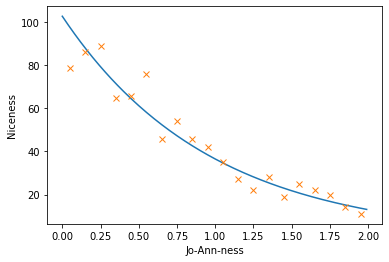

In [25]:
import scipy.optimize as opt
def fitlogdata(xin,yin):
    lnD=np.log(yin)
    def linearfunc(x,m,c):
        return m*x+c
    (popt,pcov)=np.polyfit(xin,lnD,1,cov=True)
    k=-popt[0]
    D0=np.exp(popt[1])
    return (k,D0,np.sqrt(pcov[0,0]),np.sqrt(pcov[1,1]))
(k,D0,dk,dD0)=fitlogdata(xdata,ydata)
xfit=np.arange(0.,2.,0.01)
yfit=D0*np.exp(-k*xfit)
plt.plot(xfit,yfit)
plt.plot(xdata,ydata, "x")
plt.xlabel("Jo-Ann-ness")
plt.ylabel("Niceness")
print("Exponential decay function with parameters"+" k= "+str(round(k,2))+" D= "+str(round(D0,2)))

I knew it. It's an exponential decay function with the general form:

$$
y=D e^{-kx}
$$

Now, we just need to insert the values of the parameters D and k, and this gives us the equation for your bitchiness:

$$
y=102.94 e^{-1.05x}
$$

*Babe, this confirms that you're exponentially bitchy. Happy five month-versary, cutiepie.*